### Interpolação Linear

In [1]:
# Importing python libraries.
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
from scipy.special import erf

<Figure size 432x288 with 0 Axes>

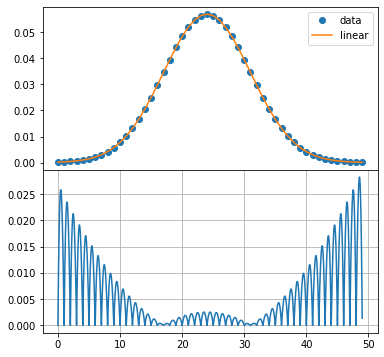

In [2]:
# Creating creating a function that calculates linear interpolation
def lin_interp_evaluate (x, f, xnew):
    fnew = np.zeros(len(xnew))
    
    for j in range(0, len(xnew)):
        for i in range(0, (len(x)-1)):
            if (x[i] <= xnew[j]) and (x[i+1] >= xnew[j]):
                dx = x[i+1] - x[i]
                df = f[i+1] - f[i]
                fnew[j]  = f[i] + df * (xnew[j] - x[i])/ dx
    return fnew
        
# Creating a Gaussian Function
def normal_dist(x , mu , sigma):
    norma = 1.0 / np.sqrt (2.0 * np.pi)
    arg = (x - mu) / sigma
    prob_density = np.exp (- 0.5 * arg * arg) * norma / sigma

    return prob_density
 
#Calculate mu and sigma, mean and standard deviation, respectively
mu = 24
sigma = 7
 
#Apply function to the data.
x_p = np.arange(0, 50, 1)
pdf = normal_dist(x_p,mu,sigma)
xnew = np.arange(x_p.min(), x_p.max(), 0.01)
ynew = lin_interp_evaluate(x_p,pdf, xnew)

plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace':0}, figsize=(6,6))


axs[0].plot(x_p, pdf, 'o', xnew, ynew, '-')
axs[0].legend(['data', 'linear'], loc='best')

# Comparing the exact solution with the linear interpolation function
axs[1].plot(xnew,np.abs(normal_dist(xnew, mu, sigma)/ynew - 1.0))
axs[1].grid ()
plt.show;

<Figure size 432x288 with 0 Axes>

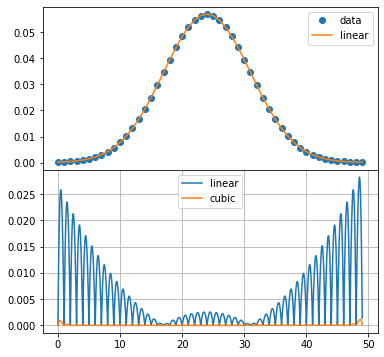

In [4]:
# Now i will calculate using scipy library function interp1d. I will difine the parameter k as 
#"linear" first.
f = interpolate.interp1d(x_p, pdf, kind = 'linear')
y_inter1 = f(xnew)

# Now defining k as "cubic"
f = interpolate.interp1d(x_p, pdf, kind = 'cubic')
y_inter3 = f(xnew)

plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace':0}, figsize=(6,6))

axs[0].plot(x_p, pdf, 'o', xnew, y_inter1, '-')
axs[0].legend(['data', 'linear'], loc='best')

# Comparing the exact solution with the linear interpolation function
axs[1].plot(xnew,np.abs(normal_dist(xnew, mu, sigma)/y_inter1 - 1.0), '-', 
            xnew,np.abs(normal_dist(xnew, mu, sigma)/y_inter3 - 1.0), '-' )
axs[1].legend(['linear', 'cubic'], loc='best')
axs[1].grid ()
plt.show;

Now we need to define the cumulative distribution function (CDF).

In [23]:
def cumulative_function(x, mu, sigma):
  
    return (erf((x-mu)/(np.sqrt(2)*sigma)) + 1)/2 

# Then, we are going to calculate the interpolated version oh the CDF
x = np.arange(0, 50, 1)
cdf = cumulative_function(x, mu, sigma)

# Using scipy library function interp1d
xnew = np.arange(x.min(), x.max(), 0.01)
f = interpolate.interp1d(x, cdf, kind='linear')
ynew =  f(xnew)

# Using my own interpolated function
y_own = lin_interp_evaluate (x, cdf, xnew)

<Figure size 432x288 with 0 Axes>

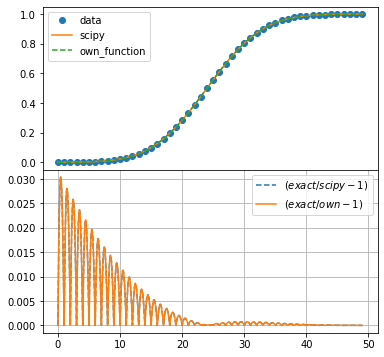

In [29]:
plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace':0}, figsize=(6,6))

axs[0].plot(x, cdf, 'o', xnew, ynew, '-', xnew, y_own, '--')
axs[0].legend(['data', 'scipy', 'own_function'], loc='best')

# Comparing the exact solution with the linear interpolation function
axs[1].plot(xnew,np.abs(cumulative_function(xnew, mu, sigma)/ynew - 1.0), '--', 
            xnew,np.abs(cumulative_function(xnew, mu, sigma)/y_own- 1.0), '-' )
axs[1].legend(['$(exact/scipy - 1)$', '$(exact/own - 1)$'], loc='best')
axs[1].grid ()
plt.show;

In [31]:
# Let's calculate the inverse functio of CDF, C(x) --> X(C)
y_1 = np.arange(0, 50, 0.0001)
x_1 = cumulative_function(y_1, mu, sigma)
xnew_1 = np.arange(x_1.min(), x_1.max(), 0.0001)
f = interpolate.interp1d(x_1, y_1, kind='linear')
ynew_1 =  f(xnew_1)

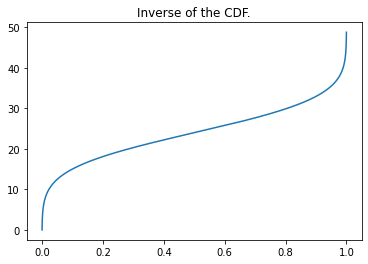

In [32]:
plt.plot(xnew_1, ynew_1, '-')
plt.title('Inverse of the CDF.')
plt.show()

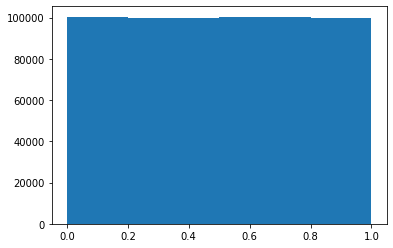

In [36]:
# Generating some uniformly distributed random numbers
rand = np.random.uniform(x_1.min(), x_1.max(), 1000000)

# The polt will show if the distribution of the random number is uniform or not
plt.hist(rand)
plt.show()

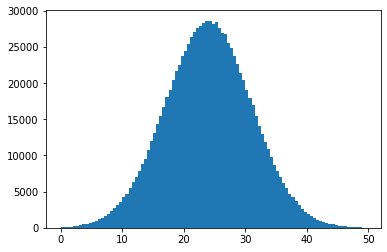

In [37]:
# Now we are going to take the random and unifor sample and apply this in the X(C) interpolated function 'f'
# and calculate the X_i
X_i = f(rand)

plt.hist(X_i, bins=np.arange(0,50,0.5))
plt.show()